# 1

In [2]:
import pandas as pd
import gzip
import json
# Define the path to your .json.gz file
json_gz_file_path = '/kaggle/input/electronics-dataset/Electronics_5.json'

# Define chunk size
chunksize = 10000  # Adjust this based on your system's capacity

# Open the compressed file and read it as a Pandas DataFrame in chunks
chunks = []
with open(json_gz_file_path, 'rb') as f:
    for chunk in pd.read_json(f, lines=True, chunksize=chunksize):
        chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

In [3]:
import pandas as pd
import gzip
import json
# Define the path to your .json.gz file
json_gz_file_path = '/kaggle/input/amazon-metadata/meta_Electronics.json'

# Define chunk size
chunksize = 10000  # Adjust this based on your system's capacity

# Open the compressed file and read it as a Pandas DataFrame in chunks
chunks = []
with open(json_gz_file_path, 'rb') as f:
    for chunk in pd.read_json(f, lines=True, chunksize=chunksize):
        chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
meta_data = pd.concat(chunks, ignore_index=True)

# 2

In [7]:
meta_data.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [8]:
df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image'],
      dtype='object')

In [9]:
product_name = "Headphones"

# 3

In [11]:
# Function to convert lists and dictionaries to tuples
def convert_to_tuple(value):
    if isinstance(value, list):
        return tuple(value)
    elif isinstance(value, dict):
        return tuple(value.items())
    else:
        return value

# Apply the conversion function to each element in the DataFrame
meta_data_processed = meta_data.applymap(convert_to_tuple)

# Replace NaN values with a placeholder
meta_data_processed.fillna('NaN', inplace=True)

# Remove duplicates
meta_data_processed.drop_duplicates(inplace=True)

# Convert 'NaN' placeholder back to actual NaN values
meta_data_processed.replace('NaN', np.nan, inplace=True)

In [14]:
# Function to convert lists and dictionaries to tuples
def convert_to_tuple(value):
    if isinstance(value, list):
        return tuple(value)
    elif isinstance(value, dict):
        return tuple(value.items())
    else:
        return value

# Apply the conversion function to each element in the DataFrame
df = df.applymap(convert_to_tuple)

# Replace NaN values with a placeholder
df.fillna('NaN', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert 'NaN' placeholder back to actual NaN values
df.replace('NaN', np.nan, inplace=True)

/tmp/ipykernel_33/3826039371.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_to_tuple)


In [15]:
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,67.0,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,"((Format:, Hardcover),)",D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3,5.0,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,"((Format:, Kindle Edition),)",Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5,4.0,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,"((Format:, Paperback),)",Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5,13.0,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,"((Format:, Hardcover),)",Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3,8.0,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,"((Format:, Hardcover),)",W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6739585,4,NaN,True,"03 21, 2017",A33MAQA919J2V8,B01HJH40WU,NaN,Kurt Wurm,"These seem like quality USB cables, time will ...",Four Stars,1490054400,NaN
6739586,4,NaN,True,"01 9, 2017",A1AKHSCPD1BHM4,B01HJH40WU,NaN,C.L Momof3,"Works great, love the longer cord. As with any...",Nice long cord,1483920000,NaN
6739587,5,2.0,True,"12 1, 2016",A2HUZO7MQAY5I2,B01HJH40WU,NaN,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400,NaN
6739588,5,2.0,True,"11 29, 2016",AJJ7VX2L91X2W,B01HJH40WU,NaN,Faith,Works well.,Five Stars,1480377600,NaN


In [25]:
# product_meta_data_rows = []
# i = 0
# for index, row in meta_data_processed.iterrows():
#     if product_name in row["title"]:
#         product_meta_data_rows.append(i)
#     i+=1

product_meta_data_rows = []
i = 0
index = 0
while index < len(meta_data_processed):
    row = meta_data_processed.iloc[index]
    if product_name in row["title"]:
        product_meta_data_rows.append(i)
    i += 1
    index += 1


In [28]:
product_meta_data_rows[-1]

756038

In [29]:
product_meta_data = meta_data_processed.iloc[product_meta_data_rows].dropna(subset = ["asin"])

In [94]:
product_data =  pd.merge(product_meta_data, df, on='asin', how='inner')

In [38]:
len(product_data)

256176

In [39]:
len(product_data.drop_duplicates())

256176

In [74]:
product_data_processed =  pd.merge(product_meta_data, df, on='asin', how='inner').dropna()

# 4

In [95]:
print("Number of Reviews:",len(product_data))

Number of Reviews: 256176


In [45]:
avg_score = sum( product_data["overall"].values )/len(product_data)
print("Average Rating Score:",avg_score)

Average Rating Score: 4.071931016176379


In [46]:
print("Number of Unique Products:",len(product_data["asin"].unique()))

Number of Unique Products: 5279


In [48]:
print("Number of Good Ratings:", sum( [ 1 for index, row in product_data.iterrows() if row["overall"] >=3 ] ) )

Number of Good Ratings: 218474


In [50]:
print("Number of Bad Ratings:", len(product_data) - sum( [ 1 for index, row in product_data.iterrows() if row["overall"] >=3 ] ) )

Number of Bad Ratings: 37702


In [52]:
print("Number of Reviews for each rating:")
for i in range(0,6):
    print( f"Rating {i}:",  sum( [ 1 for index, row in product_data.iterrows() if row["overall"] == i] ))


# print("Number of Reviews for each rating:")
# i = 0
# while i < 6:
#     count = 0
#     index = 0
#     while index < len(product_data):
#         row = product_data.iloc[index]
#         if row["overall"] == i:
#             count += 1
#         index += 1
#     print(f"Rating {i}: {count}")
#     i += 1

Number of Reviews for each rating:
Rating 0: 0
Rating 1: 19683
Rating 2: 18019
Rating 3: 26877
Rating 4: 51206
Rating 5: 140391


# 5

In [96]:
import pandas as pd
import re

# Function to remove HTML tags
def remove_html_tags(text):
    if pd.isna(text):
        return text  # If NaN, return NaN
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Apply the function to the column
product_data['reviewText'] = product_data['reviewText'].apply(remove_html_tags)

In [ ]:
product_data["reviewText"][0]

In [98]:
import pandas as pd
from unidecode import unidecode

def remove_accented_chars(text):
    if pd.isna(text):
        return text  # If NaN, return NaN
    return unidecode(text)

# Apply the function to the column
product_data['reviewText'] = product_data['reviewText'].apply(remove_accented_chars)

In [64]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.5 MB/s eta 0:00:00


In [102]:
import pandas as pd
import contractions

# Function to expand acronyms
def expand_acronyms(text):
    if pd.isna(text):
        return text
    return contractions.fix(text)

# Apply the function to the column
product_data['reviewText'] = product_data['reviewText'].apply(expand_acronyms)

In [104]:
import pandas as pd
import re

# Function to remove special characters
def remove_special_characters(text):
    if pd.isna(text):
        return text
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the column
product_data['reviewText'] = product_data['reviewText'].apply(remove_special_characters)

In [113]:
import pandas as pd
import spacy

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to perform lemmatization
def lemmatize_text(text):
    if pd.isna(text):
        return text
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

# Apply the function to the column
product_data['reviewText'] = product_data['reviewText'].apply(lemmatize_text)

KeyboardInterrupt: 

In [107]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords (run this line only once)
import nltk
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    if pd.isna(text):
        return text
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the function to the column
product_data['reviewText'] = product_data['reviewText'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 6

In [83]:
# print("Top 20 most reviewed brands:")
# brand_reviews = { brand : 0 for brand in product_data["brand"].unique() }

# for index, row in product_data.iterrows():
#     brand_reviews[row["brand"]]+=1

# top_20_brands = sorted( brand_reviews.items(), key = lambda x: x[1], reverse = True )[:20]

# for brand, number_of_reviews in top_20_brands:
#     print(brand,number_of_reviews)

print("Top 20 most reviewed brands:")
brand_reviews = {brand: 0 for brand in product_data["brand"].unique()}

index = 0
while index < len(product_data):
    row = product_data.iloc[index]
    brand_reviews[row["brand"]] += 1
    index += 1

top_20_brands = sorted(brand_reviews.items(), key=lambda x: x[1], reverse=True)[:20]

index = 0
while index < len(top_20_brands):
    brand, number_of_reviews = top_20_brands[index]
    print(brand, number_of_reviews)
    index += 1

Top 20 most reviewed brands:
Sony 21200
Sennheiser 14340
Bose 8286
Audio-Technica 6438
Bluedio 4934
Mpow 4907
Panasonic 4888
Etre Jeune 4683
Philips 4658
Symphonized 4285
MEE audio 4087
TaoTronics 4079
Koss 3845
Plantronics 3602
JVC 3521
Toysdone 3506
JLAB 3164
SoundPEATS 2778
EldHus 2725
Photive 2495


In [85]:
# last_20_brands = sorted( brand_reviews.items(), key = lambda x: x[1])[0:20]
# print("Last 20 reviewed brands:")
# for brand, number_of_reviews in last_20_brands:
#     print(brand,number_of_reviews)

last_20_brands = sorted(brand_reviews.items(), key=lambda x: x[1])[:20]
print("Last 20 reviewed brands:")

index = 0
while index < len(last_20_brands):
    brand, number_of_reviews = last_20_brands[index]
    print(brand, number_of_reviews)
    index += 1

Last 20 reviewed brands:
Honda 1
AIRDRIVES 3
NOIZY Brands 3
DetectorPro 4
PopClik 4
Targus 5
American Audio 5
Innovage 5
TVTimedirect 5
Amplivox 5
ZOpid 5
Rockford Fosgate 5
Cyber-Blue 5
SpongeBob SquarePants 5
Asus 5
Dr. Mercola 5
American DJ Supply 5
Comfort Audio 5
Gear4 5
Tt eSPORTS 5


In [88]:
import pandas as pd

average_ratings = product_data.groupby('title')['overall'].mean()

highest_rated_title = average_ratings.idxmax()

print("Headphones with the highest average rating:", highest_rated_title)

Headphones with the highest average rating: AKG K52 Headphones


In [93]:
product_data["reviewText"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
256171   NaN
256172   NaN
256173   NaN
256174   NaN
256175   NaN
Name: reviewText, Length: 256176, dtype: float64

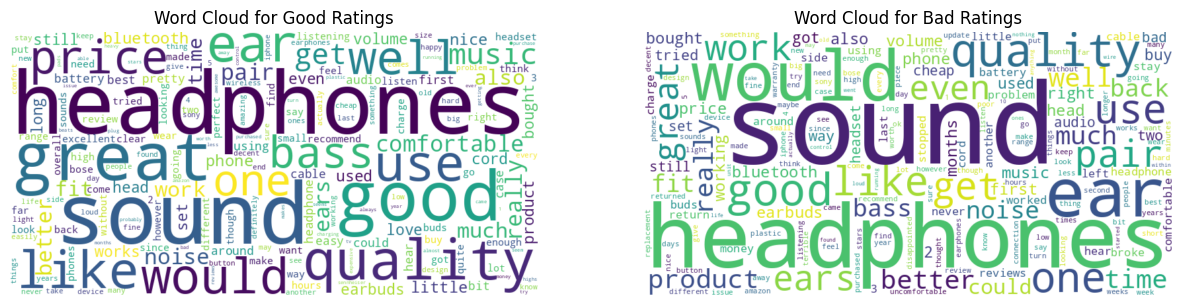

Most commonly used words for positive reviews:
[('headphones', 171390), ('sound', 168004), ('good', 107122), ('great', 103277), ('quality', 80811), ('ear', 69274), ('like', 68344), ('use', 66218), ('would', 63183), ('well', 55910)]

Most commonly used words for negative reviews:
[('sound', 24335), ('headphones', 23459), ('would', 13700), ('ear', 13141), ('quality', 12654), ('good', 11802), ('one', 10508), ('like', 9993), ('use', 9919), ('get', 8669)]


In [112]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming product_data is your DataFrame containing ratings and reviews

# Separate good and bad reviews based on 'overall' ratings
good_reviews = product_data[product_data['overall'] >= 3]['reviewText']
bad_reviews = product_data[product_data['overall'] < 3]['reviewText']

# Tokenize the reviews into words
def tokenize_reviews(reviews):
    tokens = []
    for review in reviews:
        if pd.isna(review):
            tokens.extend([])
        else:
            tokens.extend(word_tokenize(review.lower()))
    return tokens

# Tokenize, remove stopwords and punctuation, and count the frequency of each word
good_tokens = tokenize_reviews(good_reviews)
bad_tokens = tokenize_reviews(bad_reviews)


# Generate frequency distributions
good_freq_dist = FreqDist(good_tokens)
bad_freq_dist = FreqDist(bad_tokens)

# Generate word clouds
good_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(good_freq_dist)
bad_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bad_freq_dist)

# Plot word clouds
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Good Ratings')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Bad Ratings')
plt.axis('off')

plt.show()

# Report most commonly used words for positive and negative reviews
print("Most commonly used words for positive reviews:")
print(good_freq_dist.most_common(10))

print("\nMost commonly used words for negative reviews:")
print(bad_freq_dist.most_common(10))

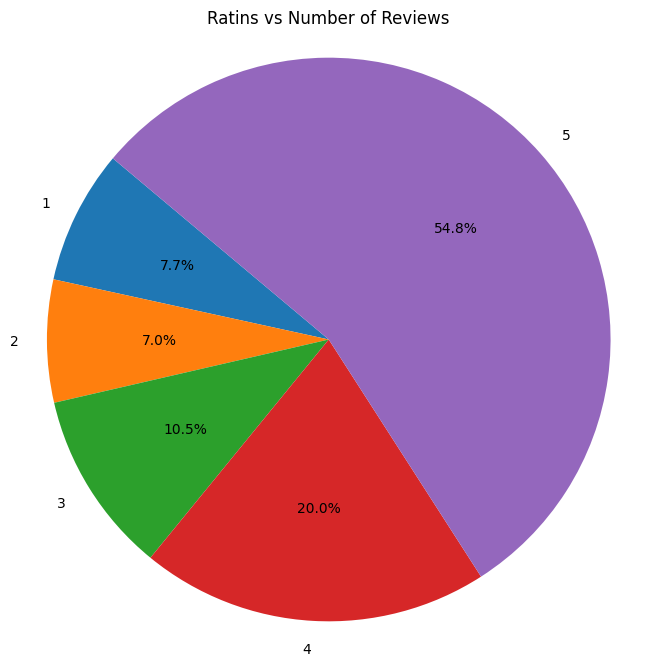

In [115]:
import matplotlib.pyplot as plt

ratings_number_of_reviews = dict()
for i in range(1,6):
    ratings_number_of_reviews[i] =   sum( [ 1 for index, row in product_data.iterrows() if row["overall"] == i] )

# ratings_number_of_reviews = dict()
# i = 1
# while i <= 5:
#     count = 0
#     index = 0
#     while index < len(product_data):
#         row = product_data.iloc[index]
#         if row["overall"] == i:
#             count += 1
#         index += 1
#     ratings_number_of_reviews[i] = count
#     i += 1

data = ratings_number_of_reviews
# Get keys and values
labels = data.keys()
sizes = data.values()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ratins vs Number of Reviews')
plt.show()

In [120]:
def extractYear(time):
    return int(time.split(",")[1].strip())
review_years = product_data["reviewTime"].apply(extractYear)

In [133]:
product_data["reviewYear"] = review_years

In [131]:
year_number_of_reviews = {year:0 for year in review_years.unique()}
for year_now in review_years:
    year_number_of_reviews[year_now]+=1
    
top_year = sorted(year_number_of_reviews.keys(), key = lambda x: year_number_of_reviews[x], reverse = True)[0]

# year_number_of_reviews = {year: 0 for year in review_years.unique()}
# index = 0
# while index < len(review_years):
#     year_now = review_years.iloc[index]
#     year_number_of_reviews[year_now] += 1
#     index += 1

# years = list(year_number_of_reviews.keys())
# top_year = years[0]
# max_reviews = year_number_of_reviews[top_year]
# index = 1
# while index < len(years):
#     year = years[index]
#     if year_number_of_reviews[year] > max_reviews:
#         top_year = year
#         max_reviews = year_number_of_reviews[year]
#     index += 1

In [137]:
year_number_of_customers = dict(product_data.groupby("reviewYear")["reviewerName"].unique())

In [142]:
top_year = sorted(year_number_of_customers.items(), key = lambda x: len(x[1]),reverse = True)[0]

In [143]:
top_year

(2016,
 array(['DH of NY', 'AllenEd', 'Barbara H. Sloan', ..., 'J. Tantillo',
        'charles h evans', 'Cheryl Showalters'], dtype=object))

# 7

In [145]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize the text in the 'reviewText' column
tokenized_reviews = product_data['reviewText'].dropna().apply(word_tokenize)

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Example usage: Get vector representation of a word
vector = model.wv['product']

# Example usage: Find most similar words
similar_words = model.wv.most_similar('product')

print("Vector representation of 'product':", vector)
print("Most similar words to 'product':", similar_words)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Vector representation of 'product': [ 0.8148372   0.5179287   2.839296    0.20666222  1.2482984  -0.6687543
  1.8193831   0.01946731  0.17043541  0.60841596  1.6596583   1.914551
  2.0726      1.9445329  -1.9632682  -1.1317077  -1.6372058   0.2845709
  0.9846879   0.39652294 -0.25215417  0.3630338   3.1291351   0.32543
  1.2182434  -0.29796782 -0.35468173 -1.8647777   1.73547    -1.241593
  0.7067719  -0.39502367  0.57878476  0.9617572  -0.1987085  -1.5481757
  0.1508677   1.649117    1.8381734  -1.513592   -2.559605   -1.1918464
 -1.085925   -2.8113396  -0.672437    3.4968193  -0.47331166  0.67169374
 -1.049721    0.9423194   0.0141478  -1.0171655  -2.0159984  -0.9065655
  1.1683576  -0.17332143  1.4321544   1.5680482   4.1311407  -1.7245481
  1.2913809  -1.9228139   0.06321694 -1.1775931  -1.0896939  -2.5887907
  0.52995926 -1.0813146  -2.093884   -0.8785773  -2.737559 

In [150]:
def tokenize_review(text):
    if pd.isna(text):
        return []
    else:
        return word_tokenize(text)
def get_average_embedding(words, model):
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if embeddings:
        return sum(embeddings) / len(embeddings)
    else:
        return [0] * model.vector_size  # Return zero vector if none of the words are in the vocabulary

# Get embeddings for each review
review_embeddings = [get_average_embedding(review, model) for review in product_data['reviewText'].apply(tokenize_review)]

In [154]:
product_data["reviewTextEmbeddings"] = review_embeddings

# 8

In [161]:
def review_class(overall):
    if overall>3:
        return "Good"
    elif overall == 3:
        return "Average"
    else:
        return "Bad"
product_data["ratingClass"] = [review_class(row["overall"]) for index,row in product_data.iterrows()]

In [163]:
product_data.head()["overall"]

0    5
1    5
2    4
3    5
4    3
Name: overall, dtype: int64

In [171]:
product_data['reviewText'] = product_data['reviewText'].str.replace(',', r'\,')

In [173]:
product_data

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,...,reviewerID,style,reviewerName,reviewText,summary,unixReviewTime,image,reviewYear,reviewTextEmbeddings,ratingClass
0,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,A15U5NUS1EY7IQ,"((Format:, Personal Computers),)",S. Bommarito,getting listening stations going several eleme...,Works well,1362009600,NaN,2013,"[0.39820313, -0.5066136, 0.6656036, 0.16812785...",Good
1,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,AHGGNAIT6BH5X,NaN,Edward H,Needed Headset watching editing videos late ni...,HP 200 Stereo Headset,1350432000,NaN,2012,"[0.546956, 0.3385041, 0.7806391, 0.4350867, 0....",Good
2,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,A33HUURDJ4DVG3,"((Format:, Personal Computers),)",HB,town month needed pair headphones walking want...,"For the price, you cannot beat them",1348704000,NaN,2012,"[0.7141827, -0.35806555, 0.6878282, 0.10973853...",Good
3,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,A680RUE1FDO8B,"((Format:, Personal Computers),)",Jerry Saperstein,Obviously headphones audiophile person expects...,Excellent day-to-day headphones,1227744000,NaN,2008,"[0.23416969, -0.012034412, 0.62002635, 0.56528...",Good
4,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,A3OLAZKM77XR6P,"((Format:, Personal Computers),)",Tennis Ace,bought headphones Tower Records 2 years ago ni...,Foldable but didn't last long,1198454400,NaN,2007,"[0.076549865, 0.09687533, 0.1571205, 0.3206622...",Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256171,"(Electronics, Headphones, Earbud Headphones)",,(),,"Bluetooth Headphones,Yostyle Wireless Headphon...","(B01I0U77O8,)",,Yostyle,"(With Bluetooth V4.1, advanced apt-X technolog...","(>#186,311 in Cell Phones & Accessories (See T...",...,A50A134UOQSQF,"((Color:, Black),)",charles h evans,Bought flash sale excellent vehicle vents used...,"Good holder, simple and functional",1473292800,NaN,2016,"[0.47308552, 0.08515313, 0.17771193, 0.3822847...",Good
256172,"(Electronics, Headphones, Earbud Headphones)",,(),,"Bluetooth Headphones,Yostyle Wireless Headphon...","(B01I0U77O8,)",,Yostyle,"(With Bluetooth V4.1, advanced apt-X technolog...","(>#186,311 in Cell Phones & Accessories (See T...",...,A2S2R3SUSFHJ61,"((Color:, Black),)",Cheryl Showalters,excellent especially price,works great and the price is excellent. Holds...,1470960000,NaN,2016,"[-0.122639336, -1.0518194, 0.3814229, 0.033468...",Good
256173,"(Electronics, Headphones, Earbud Headphones)",,(),,"Bluetooth Headphones,Yostyle Wireless Headphon...","(B01I0U77O8,)",,Yostyle,"(With Bluetooth V4.1, advanced apt-X technolog...","(>#186,311 in Cell Phones & Accessories (See T...",...,A3VA3VK4PO1JD,"((Color:, White),)",CD,used 1 week time writing work find earphone st...,They work...,1537574400,NaN,2018,"[0.35527378, -0.37770352, 0.54490197, 0.656336...",Good

In [180]:
import pickle as pkl
with open("Headphones.pkl","wb") as file:
    pkl.dump(product_data,file)

In [7]:
import pickle as pkl

with open("/kaggle/input/headphones-dataset/Headphones.pkl","rb") as file:
    product_data_2 = pkl.load(file)

In [3]:
product_data_2

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,...,reviewerID,style,reviewerName,reviewText,summary,unixReviewTime,image,reviewYear,reviewTextEmbeddings,ratingClass
0,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,A15U5NUS1EY7IQ,"((Format:, Personal Computers),)",S. Bommarito,getting listening stations going several eleme...,Works well,1362009600,NaN,2013,"[0.39820313, -0.5066136, 0.6656036, 0.16812785...",Good
1,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,AHGGNAIT6BH5X,NaN,Edward H,Needed Headset watching editing videos late ni...,HP 200 Stereo Headset,1350432000,NaN,2012,"[0.546956, 0.3385041, 0.7806391, 0.4350867, 0....",Good
2,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,A33HUURDJ4DVG3,"((Format:, Personal Computers),)",HB,town month needed pair headphones walking want...,"For the price, you cannot beat them",1348704000,NaN,2012,"[0.7141827, -0.35806555, 0.6878282, 0.10973853...",Good
3,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,A680RUE1FDO8B,"((Format:, Personal Computers),)",Jerry Saperstein,Obviously headphones audiophile person expects...,Excellent day-to-day headphones,1227744000,NaN,2008,"[0.23416969, -0.012034412, 0.62002635, 0.56528...",Good
4,"(Electronics, Headphones, On-Ear Headphones)",,(The stylish HP200S Stereo Line silver headpho...,,Maxell 190318 Lightweight Adjustable Open Air ...,(),,Maxell,"(Lightweight, Open-air Headphones, Ideal For A...","(>#53,588 in Cell Phones & Accessories (See To...",...,A3OLAZKM77XR6P,"((Format:, Personal Computers),)",Tennis Ace,bought headphones Tower Records 2 years ago ni...,Foldable but didn't last long,1198454400,NaN,2007,"[0.076549865, 0.09687533, 0.1571205, 0.3206622...",Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256171,"(Electronics, Headphones, Earbud Headphones)",,(),,"Bluetooth Headphones,Yostyle Wireless Headphon...","(B01I0U77O8,)",,Yostyle,"(With Bluetooth V4.1, advanced apt-X technolog...","(>#186,311 in Cell Phones & Accessories (See T...",...,A50A134UOQSQF,"((Color:, Black),)",charles h evans,Bought flash sale excellent vehicle vents used...,"Good holder, simple and functional",1473292800,NaN,2016,"[0.47308552, 0.08515313, 0.17771193, 0.3822847...",Good
256172,"(Electronics, Headphones, Earbud Headphones)",,(),,"Bluetooth Headphones,Yostyle Wireless Headphon...","(B01I0U77O8,)",,Yostyle,"(With Bluetooth V4.1, advanced apt-X technolog...","(>#186,311 in Cell Phones & Accessories (See T...",...,A2S2R3SUSFHJ61,"((Color:, Black),)",Cheryl Showalters,excellent especially price,works great and the price is excellent. Holds...,1470960000,NaN,2016,"[-0.122639336, -1.0518194, 0.3814229, 0.033468...",Good
256173,"(Electronics, Headphones, Earbud Headphones)",,(),,"Bluetooth Headphones,Yostyle Wireless Headphon...","(B01I0U77O8,)",,Yostyle,"(With Bluetooth V4.1, advanced apt-X technolog...","(>#186,311 in Cell Phones & Accessories (See T...",...,A3VA3VK4PO1JD,"((Color:, White),)",CD,used 1 week time writing work find earphone st...,They work...,1537574400,NaN,2018,"[0.35527378, -0.37770352, 0.54490197, 0.656336...",Good

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

good_threshold = 4.0
bad_threshold = 3.0

product_df = product_data_2.dropna(subset=['overall', 'reviewText'])
product_df['Rating Class'] = product_df['overall'].apply(lambda x: 'Good' if x >= good_threshold else ('Average' if x == bad_threshold else 'Bad'))

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(product_df['Rating Class'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(product_df['reviewText'])


indices_y0 = np.where(y == 0)[0]
indices_y1 = np.where(y == 1)[0]
indices_y2 = np.where(y == 2)[0]

num_indices_to_select = int(0.1 * len(indices_y2))

selected_indices_y2 = np.random.choice(indices_y2, size=num_indices_to_select, replace=False)

sampled_indices = np.concatenate([indices_y0, indices_y1, selected_indices_y2])

sampled_X = X[sampled_indices]
sampled_y = y[sampled_indices]
# print(sampled_y.shape, sampled_X.shape)

X_train, X_test, y_train, y_test = train_test_split(sampled_X, sampled_y, test_size=0.25, random_state=42)


/tmp/ipykernel_33/4224937945.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Rating Class'] = product_df['overall'].apply(lambda x: 'Good' if x >= good_threshold else ('Average' if x == bad_threshold else 'Bad'))


Label Mapping:
{'Average': 0, 'Bad': 1, 'Good': 2}


In [6]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

models = {
    'Logistic Regression': LogisticRegression(),
#     'Random Forest': RandomForestClassifier(n_estimators = 100),
    'Decision Tree': DecisionTreeClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K nearest neighbors': KNeighborsClassifier(n_neighbors=4)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
    print(f'Model: {name}')
    print(report)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
              precision    recall  f1-score   support

         Bad       0.57      0.53      0.55      6634
     Average       0.73      0.80      0.76      9517
        Good       0.75      0.69      0.72      4782

    accuracy                           0.69     20933
   macro avg       0.68      0.67      0.68     20933
weighted avg       0.68      0.69      0.69     20933

Model: Decision Tree
              precision    recall  f1-score   support

         Bad       0.44      0.44      0.44      6634
     Average       0.64      0.66      0.65      9517
        Good       0.51      0.49      0.50      4782

    accuracy                           0.55     20933
   macro avg       0.53      0.53      0.53     20933
weighted avg       0.55      0.55      0.55     20933

Model: Multinomial Naive Bayes
              precision    recall  f1-score   support

         Bad       0.51      0.20      0.28      6634
     Average       0.52      0.97      0.68      9

In [9]:
sampled_df = product_df.sample(frac=0.1, random_state=42) 
sampled_df.reset_index(drop=True, inplace=True)

sampled_df.info()
rating_matrix = sampled_df.pivot_table(index='reviewerID', columns='asin', values='overall')
min_rating = rating_matrix.min().min()
max_rating = rating_matrix.max().max()
normalized_rating_matrix = (rating_matrix - min_rating) / (max_rating - min_rating)
normalized_rating_matrix = normalized_rating_matrix.fillna(0)
non_zero_count = np.count_nonzero(normalized_rating_matrix)

print("Number of non-zero values in the DataFrame:", non_zero_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              25614 non-null  object
 1   tech1                 25614 non-null  object
 2   description           25614 non-null  object
 3   fit                   25614 non-null  object
 4   title                 25614 non-null  object
 5   also_buy              25614 non-null  object
 6   tech2                 25614 non-null  object
 7   brand                 25614 non-null  object
 8   feature               25614 non-null  object
 9   rank                  25614 non-null  object
 10  also_view             25614 non-null  object
 11  main_cat              25614 non-null  object
 12  similar_item          25614 non-null  object
 13  date                  25614 non-null  object
 14  price                 25614 non-null  object
 15  asin                  25614 non-null

In [ ]:
normalized_rating_matrix.head()

In [5]:
# # from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_absolute_error
# import numpy as np

# def cosine_similarity(X, Y):

#     # Compute dot product
#     dot_product = np.dot(X, Y.T)

#     # Compute norms
#     norm_X = np.linalg.norm(X, axis=1)
#     norm_Y = np.linalg.norm(Y, axis=1)

#     # Compute cosine similarity
#     similarity = dot_product / (np.outer(norm_X, norm_Y) + 1e-10)  # Adding a small value to avoid division by zero

#     return similarity

# def find_similar_users_2(user_id, rating_matrix, val_vector, top_n):
#     # Calculate cosine similarity between the given user (val_vector) and all users in the training set (rating_matrix)
#     similarity = cosine_similarity(rating_matrix, val_vector.reshape(1, -1))
    
#     # Sort the similarities and get the indices of top_n similar users
#     similar_users = np.argsort(similarity[:, 0])[::-1][:top_n]
    
#     return similar_users

# def user_user_recommendation(rating_matrix, k_folds, top_ns):
#     kf = KFold(n_splits=k_folds)
#     mae_values = []
    
#     for top_n in top_ns:
#         fold_mae = []
#         for train_index, val_index in kf.split(rating_matrix):
#             train_set = rating_matrix.iloc[train_index]
#             val_set = rating_matrix.iloc[val_index]
#             # print(train_set.shape, val_set.shape)
#             predicted_ratings = np.zeros_like(val_set)
#             val_ratings = np.zeros_like(val_set)
#             count = 0
#             for user_id, user_ratings in val_set.iterrows():
#                 # print(count, "\\", len(val_set))
#                 similar_users = find_similar_users_2(user_id, train_set,user_ratings.values, top_n)
#                 avg_rating = train_set.iloc[similar_users].mean(axis=0)
#                 predicted_ratings[count] = avg_rating.values
#                 val_ratings[count] = user_ratings.values
#                 count += 1

#                 # print("--")
#             break
                
#         mae_values.append(mean_absolute_error(val_ratings[val_ratings != 0], predicted_ratings[val_ratings != 0]))
#         print(top_n ,"-Done")
#     return mae_values


# def item_item_recommendation(rating_matrix, k_folds, top_ns):
#     kf = KFold(n_splits=k_folds)
#     mae_values = []
    
#     for top_n in top_ns:
#         fold_mae = []
#         rating_matrix_transposed = rating_matrix.T
#         # print(rating_matrix_transposed.info())
#         for train_index, val_index in kf.split(rating_matrix_transposed):
#             train_set = rating_matrix_transposed.iloc[train_index]
#             val_set = rating_matrix_transposed.iloc[val_index]
#             predicted_ratings = np.zeros_like(val_set)
#             val_ratings = np.zeros_like(val_set)
#             count = 0
#             for user_id, user_ratings in val_set.iterrows():

#                 similar_users = find_similar_users_2(user_id, train_set,user_ratings.values, top_n)
#                 avg_rating = train_set.iloc[similar_users].mean(axis=0)
#                 predicted_ratings[count] = avg_rating.values
#                 val_ratings[count] = user_ratings.values
#                 count += 1
#             break
                
#         mae_values.append(mean_absolute_error(val_ratings[val_ratings != 0], predicted_ratings[val_ratings != 0]))
#         print(top_n ,"-Done")
#     return mae_values

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

def cosine_similarity(X, Y):
    # Compute dot product
    dot_product = np.dot(X, Y.T)

    # Compute norms
    norm_X = np.linalg.norm(X, axis=1)
    norm_Y = np.linalg.norm(Y, axis=1)

    # Compute cosine similarity
    similarity = dot_product / (np.outer(norm_X, norm_Y) + 1e-10)  # Adding a small value to avoid division by zero

    return similarity

def find_similar_users_2(user_id, rating_matrix, val_vector, top_n):
    # Calculate cosine similarity between the given user (val_vector) and all users in the training set (rating_matrix)
    similarity = cosine_similarity(rating_matrix, val_vector.reshape(1, -1))
    
    # Sort the similarities and get the indices of top_n similar users
    similar_users = np.argsort(similarity[:, 0])[::-1][:top_n]
    
    return similar_users

def user_user_recommendation(rating_matrix, k_folds, top_ns):
    kf = KFold(n_splits=k_folds)
    mae_values = []

    top_ns_index = 0
    while top_ns_index < len(top_ns):
        top_n = top_ns[top_ns_index]
        fold_mae = []

        for train_index, val_index in kf.split(rating_matrix):
            train_set = rating_matrix.iloc[train_index]
            val_set = rating_matrix.iloc[val_index]
            # print(train_set.shape, val_set.shape)
            predicted_ratings = np.zeros_like(val_set)
            val_ratings = np.zeros_like(val_set)
            count = 0
            for user_id, user_ratings in val_set.iterrows():
                # print(count, "\\", len(val_set))
                similar_users = find_similar_users_2(user_id, train_set,user_ratings.values, top_n)
                avg_rating = train_set.iloc[similar_users].mean(axis=0)
                predicted_ratings[count] = avg_rating.values
                val_ratings[count] = user_ratings.values
                count += 1

                # print("--")
            break
        mae_values.append(mean_absolute_error(val_ratings[val_ratings != 0], predicted_ratings[val_ratings != 0]))
        print(top_n ,"-Done")
        top_ns_index += 1

    return mae_values

def item_item_recommendation(rating_matrix, k_folds, top_ns):
    kf = KFold(n_splits=k_folds)
    mae_values = []

    top_ns_index = 0
    while top_ns_index < len(top_ns):
        top_n = top_ns[top_ns_index]
        fold_mae = []

        rating_matrix_transposed = rating_matrix.T
        # print(rating_matrix_transposed.info())
        for train_index, val_index in kf.split(rating_matrix_transposed):
            train_set = rating_matrix_transposed.iloc[train_index]
            val_set = rating_matrix_transposed.iloc[val_index]
            predicted_ratings = np.zeros_like(val_set)
            val_ratings = np.zeros_like(val_set)
            count = 0
            for user_id, user_ratings in val_set.iterrows():
                similar_users = find_similar_users_2(user_id, train_set,user_ratings.values, top_n)
                avg_rating = train_set.iloc[similar_users].mean(axis=0)
                predicted_ratings[count] = avg_rating.values
                val_ratings[count] = user_ratings.values
                count += 1
            break

        mae_values.append(mean_absolute_error(val_ratings[val_ratings != 0], predicted_ratings[val_ratings != 0]))
        print(top_n ,"-Done")
        top_ns_index += 1

    return mae_values

In [7]:
top_ns = [10, 20, 30, 40, 50]
k_folds = 5
user_mae_values = user_user_recommendation(normalized_rating_matrix, k_folds ,top_ns)

KeyboardInterrupt: 

In [ ]:
top_ns  = [10, 20, 30, 40, 50]
k_folds = 5
item_mae_values = item_item_recommendation(normalized_rating_matrix, k_folds ,top_ns)

In [ ]:
print(user_mae_values, item_mae_values)

In [ ]:
plt.plot([10, 20, 30, 40, 50], user_mae_values, label = "user-user")
plt.plot([10, 20, 30, 40, 50], item_mae_values, label = "item-item")
plt.legend()
plt.show()

In [ ]:
top_products = df.groupby('asin')['overall'].sum().sort_values(ascending=False).head(10)
print("Top 10 products by user sum ratings:")
print(top_products)

In [ ]:
print("Top 10 products by user sum ratings:")
for asin in top_products.index:
    print(asin, meta_data_processed[meta_data_processed["asin"] == asin]["title"].values[0],top_products[asin])